Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets], and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [21]:
import seaborn as sns
%matplotlib inline
import numpy as np

## Data
Seaborn comes with built-in data sets!

In [22]:
tips = sns.load_dataset('tips')

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## distplot


Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.


The distplot shows the distribution of a univariate set of observations.

https://seaborn.pydata.org/generated/seaborn.distplot.html


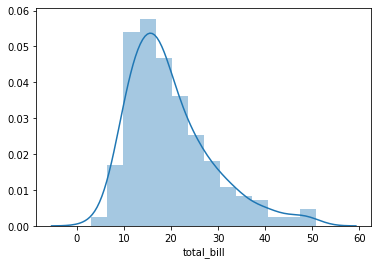

In [5]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde(kernel density estimation) layer and just have the histogram use:

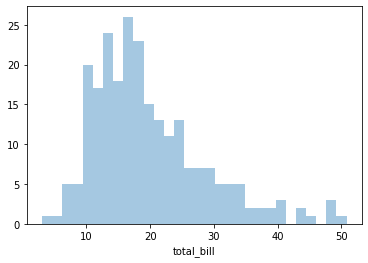

In [6]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

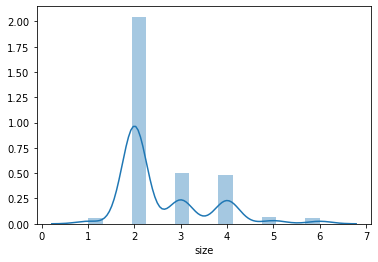

In [ ]:
sns.distplot(tips['size'])
# Safe to ignore warnings

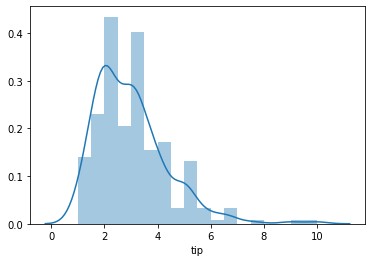

In [25]:
sns.distplot(tips['tip'])


## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”


https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=seaborn%20jointplot#seaborn.jointplot


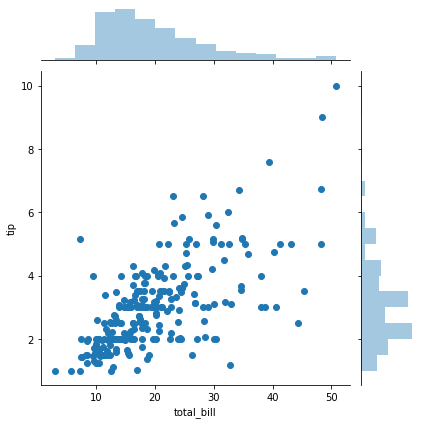

In [30]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

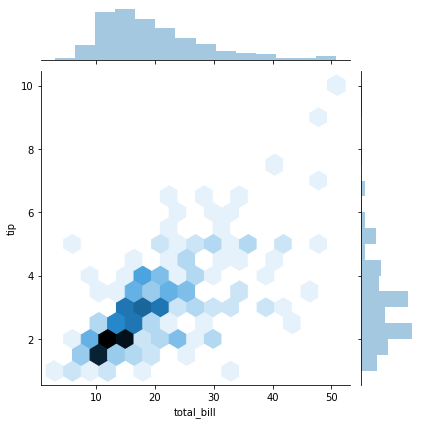

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

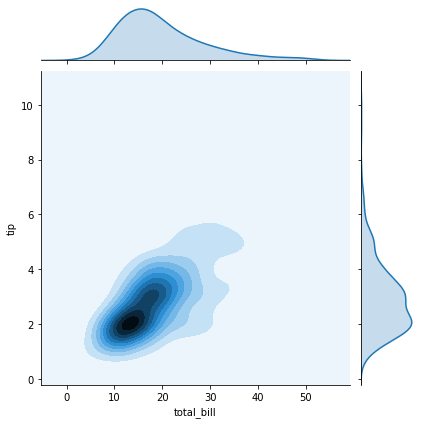

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

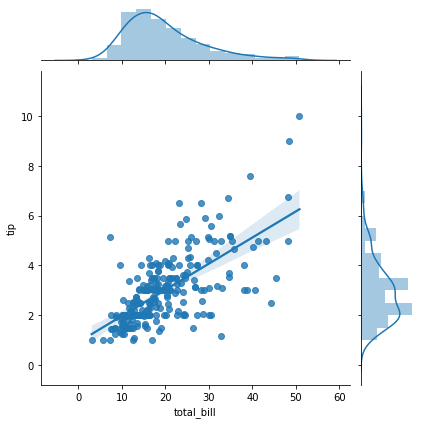

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

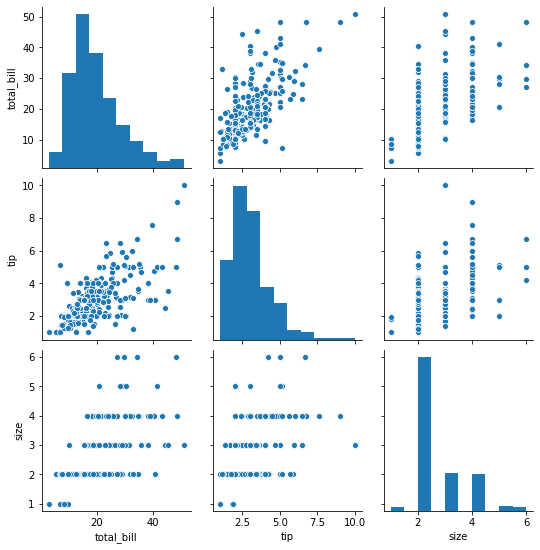

In [12]:
sns.pairplot(tips)

Hue parameter - it must be a categorical data (not numerical or continuous)

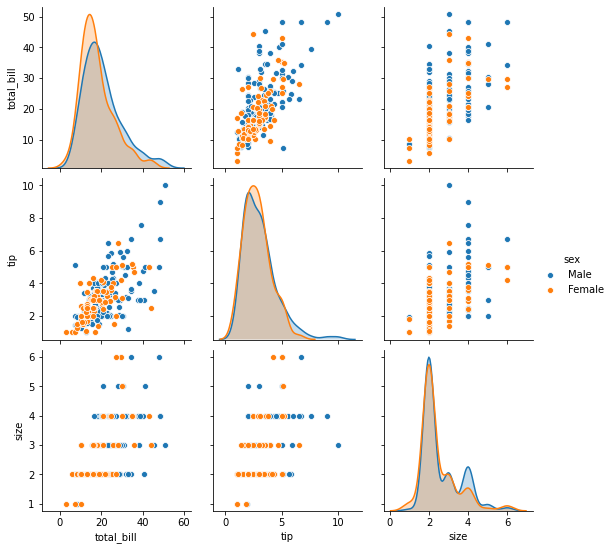

In [13]:
sns.pairplot(tips,hue='sex')

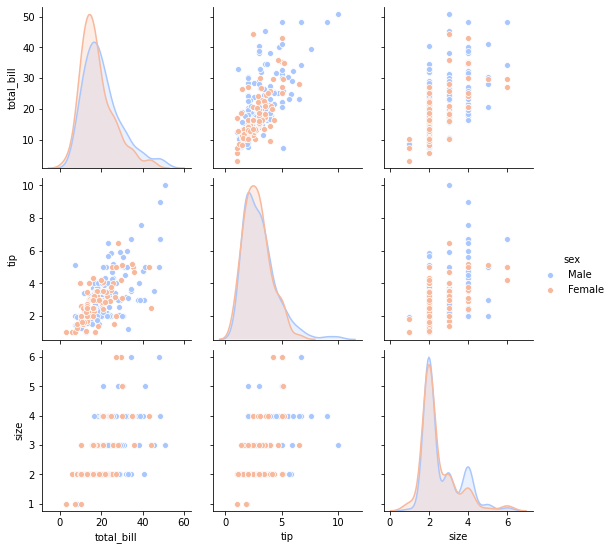

In [14]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

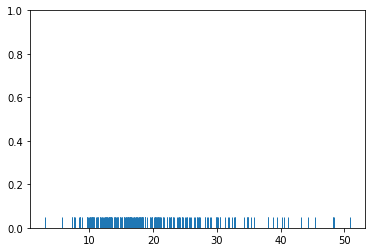

In [ ]:
sns.rugplot(tips['total_bill'])

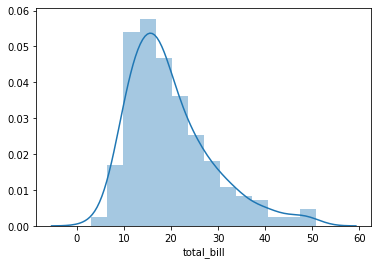

In [17]:
sns.distplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

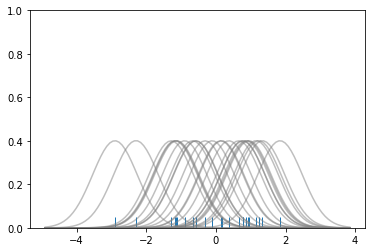

In [19]:
# Don't worry about understanding this code!
# It's just for the diagram below

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

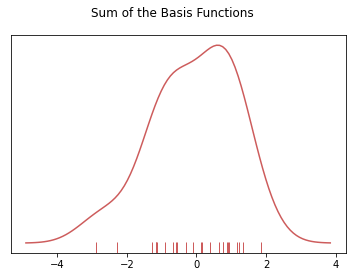

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

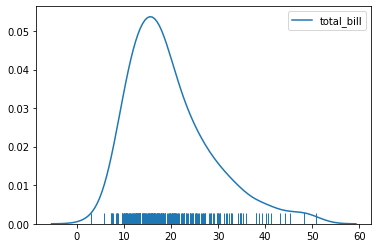

In [ ]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

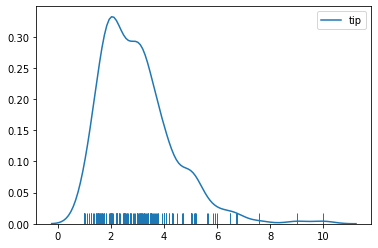

In [ ]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])